In [3]:
# 读取文件
import pandas as pd
import numpy as np
file_path1 = './NYCBike1/MoESharedAblation/ablation.csv'
file_path2 = './NYCBike2/MoESharedAblation/ablation.csv'
file_path3 = './NYCTaxi/MoESharedAblation/ablation.csv'
csv_data_parsed = pd.read_csv(file_path1, header=None)

full = csv_data_parsed.iloc[1, 1:].tolist() 
half = csv_data_parsed.iloc[2, 1:].tolist()
woS = csv_data_parsed.iloc[3, 1:].tolist()
woT = csv_data_parsed.iloc[4, 1:].tolist()
woST = csv_data_parsed.iloc[5, 1:].tolist()

# Processing the values to remove spaces and percentages, then converting them to numerical values
full = np.array([float(value.strip()) for value in full])
half = np.array([float(value.strip()) for value in half])
woS = np.array([float(value.strip()) for value in woS])
woT = np.array([float(value.strip()) for value in woT])
woST = np.array([float(value.strip()) for value in woST])


all = [full, half, woS, woT, woST]
all[0][0]

0.6

In [4]:
mae_list = []
mape_list = []
for i in range(5):
    mae = all[i][0]*all[i][1] + (1-all[i][0])*all[i][2]
    mape = all[i][0]*all[i][3] + (1-all[i][0])*all[i][4]
    mae_list.append(mae)
    mape_list.append(mape)

(mae_list, mape_list)

([4.922, 4.9, 4.958, 4.942, 4.946], [22.88, 22.916, 23.128, 22.896, 22.674])

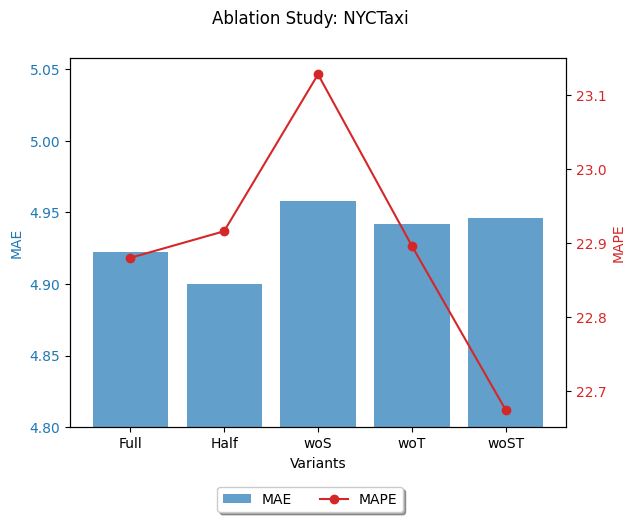

In [5]:
import matplotlib.pyplot as plt
variants = ["Full", "Half", "woS", "woT", "woST"]

# Recreating the figure and axes
fig, ax1 = plt.subplots()

# Bar plot for MAE with adjusted y-axis range
color_mae = 'tab:blue'
ax1.bar(variants, mae_list, color=color_mae, alpha=0.7, label='MAE')
ax1.set_xlabel('Variants')
ax1.set_ylabel('MAE', color=color_mae)
ax1.tick_params(axis='y', labelcolor=color_mae)
ax1.set_ylim([min(mae_list) - 0.1, max(mae_list) + 0.1])  # Setting limits around the min and max of mae_list

# Setting up the second axes for MAPE
ax2 = ax1.twinx()
color_mape = 'tab:red'
ax2.plot(variants, mape_list, color=color_mape, marker='o', linestyle='-', label='MAPE')
ax2.set_ylabel('MAPE', color=color_mape)
ax2.tick_params(axis='y', labelcolor=color_mape)

# Adding title and legends
fig.suptitle('Ablation Study: NYCTaxi')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), shadow=True, ncol=2)

# Displaying the adjusted plot
plt.show()